# Decision tree classifier predicting customer churn

***Edit this cell with your name(s), tutorial number(s) and ID(s)***

---

Name: Ahmed Bahaa

ID:49-0354

Tutorial: T2




## Dataset Description

The data set includes information about:

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

Each row represents a customer, and each column represents customer attributes as described below.

| Column | Description|
|-|-|
|gender|Whether the customer is a male or a female|
|SeniorCitizen| Whether the customer is a senior citizen or not (1, 0)|
|Partner|Whether the customer has a partner or not (Yes, No)|
|Dependents|Whether the customer has dependents or not (Yes, No)|
|tenure| Number of months the customer has stayed with the company|
|PhoneService|Whether the customer has a phone service or not (Yes, No)|
|MultipleLines|Whether the customer has multiple lines or not (Yes, No, No phone service*)|
|InternetService|Customer’s internet service provider (DSL, Fiber optic, No)|
|OnlineSecurity|Whether the customer has online security or not (Yes, No, No internet service**)|
|OnlineBackup|Whether the customer has online backup or not (Yes, No, No internet service)|
|DeviceProtection|Whether the customer has device protection or not (Yes, No, No internet service)|
|TechSupport|Whether the customer has tech support or not (Yes, No, No internet service)|
|StreamingTV|Whether the customer has streaming TV or not (Yes, No, No internet service) |
|StreamingMovies|Whether the customer has streaming movies or not (Yes, No, No internet service)|
|Contract|The contract term of the customer (Month-to-month, One year, Two year)|
|PaperlessBilling|Whether the customer has paperless billing or not (Yes, No)|
|PaymentMethod|The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))|
|MonthlyCharges|The amount charged to the customer monthly|
|TotalCharges|The total amount charged to the customer|
|Churn|Whether the customer churned or not (Yes or No)|

\* No phone service means the customer's plan does not include calling (could be a data-only plan)

\*\* No internet service means the customer's plan does not include internet/data and so the addon package does not apply

## Importing Libraries & Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use("seaborn")

df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2022/main/data/telecom_churn.csv')

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,$29.85/m,$29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,$56.95/m,$1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,$53.85/m,$108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),$42.3/m,$1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,$70.7/m,$151.65,Yes


## Data Inspection

In [2]:
#Checking the unique values in each column
for column in df.columns:
    print(f"{column} : {df[column].unique()}")
    print("====================================")

customerID : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transf

In [3]:
# Checking the number of unique values in each column
for column in df.columns:
    print(f"{column}: Number of unique values {df[column].nunique()}")
    print("==========================================================")

customerID: Number of unique values 6976
gender: Number of unique values 2
SeniorCitizen: Number of unique values 2
Partner: Number of unique values 2
Dependents: Number of unique values 2
tenure: Number of unique values 72
PhoneService: Number of unique values 2
MultipleLines: Number of unique values 3
InternetService: Number of unique values 3
OnlineSecurity: Number of unique values 3
OnlineBackup: Number of unique values 3
DeviceProtection: Number of unique values 3
TechSupport: Number of unique values 3
StreamingTV: Number of unique values 3
StreamingMovies: Number of unique values 3
Contract: Number of unique values 3
PaperlessBilling: Number of unique values 2
PaymentMethod: Number of unique values 4
MonthlyCharges: Number of unique values 1584
TotalCharges: Number of unique values 5783
Churn: Number of unique values 2


In [4]:
# Values under each categorical column
categorical_col = []
for column in df.columns:
    if df[column].dtype == object:
        categorical_col.append(column)
        print(f"{column} : {df[column].unique()}")
        print("====================================")

customerID : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : ['$29.85/m' '$56.95/m' '$53.85/m' ... '$63.1/m' '$44.2/m' '$78.7/m']
TotalCharges : ['$29.85' '$1889.5' '$108.15' ... '$346.45' '$306.6' '$6844.5']
Churn : ['No' 'Yes']


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        6976 non-null   object
 1   gender            7032 non-null   object
 2   SeniorCitizen     7032 non-null   int64 
 3   Partner           7032 non-null   object
 4   Dependents        7032 non-null   object
 5   tenure            7032 non-null   int64 
 6   PhoneService      7032 non-null   object
 7   MultipleLines     7032 non-null   object
 8   InternetService   7032 non-null   object
 9   OnlineSecurity    7032 non-null   object
 10  OnlineBackup      7032 non-null   object
 11  DeviceProtection  7032 non-null   object
 12  TechSupport       7032 non-null   object
 13  StreamingTV       7032 non-null   object
 14  StreamingMovies   7032 non-null   object
 15  Contract          7032 non-null   object
 16  PaperlessBilling  7032 non-null   object
 17  PaymentMethod 

In [6]:
# We have null values in the customerID and Total Charges that needs to be removed
df.isnull().sum()

customerID           56
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines         0
InternetService       0
OnlineSecurity        0
OnlineBackup          0
DeviceProtection      0
TechSupport           0
StreamingTV           0
StreamingMovies       0
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges        852
Churn                 0
dtype: int64

## Data Cleaning

In [7]:
# Dropping customerID as it isn't needed in the model 
df=df.drop('customerID' , axis=1)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,$29.85/m,$29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,$56.95/m,$1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,$53.85/m,$108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),$42.3/m,$1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,$70.7/m,$151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,$84.8/m,$1990.5,No
7028,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),$103.2/m,$7362.9,No
7029,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,$29.6/m,$346.45,No
7030,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,$74.4/m,$306.6,Yes


In [8]:
df=df.replace(to_replace="No phone service",
           value="No")
df=df.replace(to_replace="No internet service",
           value="No")

In [9]:
# Removing the /m and $ from monthly charges and converting it to float
df['MonthlyCharges'] = df['MonthlyCharges'].apply(lambda x: (x.replace('/m', '')))
df['MonthlyCharges'] = df['MonthlyCharges'].apply(lambda x: float(x.replace('$', '')))
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,$29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,$1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,$108.15,Yes
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,$1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,$151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,$1990.5,No
7028,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,$7362.9,No
7029,Female,0,Yes,Yes,11,No,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,$346.45,No
7030,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,$306.6,Yes


In [10]:
# Removing the $ sign and converting total charges from String to float
df['TotalCharges'] = df['TotalCharges'].str.replace('$', '')
df['TotalCharges'] = df['TotalCharges'].astype(float)
df

<ipython-input-10-5d2bfa7b5eea>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['TotalCharges'] = df['TotalCharges'].str.replace('$', '')


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7028,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7029,Female,0,Yes,Yes,11,No,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7030,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [11]:
# Monthly and Total charges are now float instead of object
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


In [12]:
# Values under each categorical column, Now most of them are Yes and No after replacing "No internet service" and "No phone service" with "No"
categorical_col = []
for column in df.columns:
    if df[column].dtype == object:
        categorical_col.append(column)
        print(f"{column} : {df[column].unique()}")
        print("====================================")

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [13]:
#Filling NAN values with mean 
df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7028,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7029,Female,0,Yes,Yes,11,No,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7030,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [14]:
#After filling the column total charges with the mean value and after removing customer id  column there are no null values 
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [15]:
#encoding columns into their numerical equivalent for use in the bar plot and correlation matrix.
#BINARY ATTRIBUTES WON'T MATTER WHICH ENCODING WHETHER LABEL OR ONE-HOT SO WE USED ONE-HOT ENCODING
#FOR INTERNETSERVICE AND PAYMENT METHOD WE USED ONE-HOT ENCODING AS THE VALUES ARE NOMINAL AND NOT ORDINAL AS THEY HAVE NOR ORDER
#AS FOR CONTRACT WE ENCODED IT AS LABEL ENCODING AS IT IS ORDINAL AND HAS AN ORDER FROM LOWEST TO HIGHEST:MONTH BY MONTH-ONE YEAR-TWO YEAR
df['Churn'] = df['Churn'].astype('category').cat.codes
df['Churn']

0       0
1       0
2       1
3       0
4       1
       ..
7027    0
7028    0
7029    0
7030    1
7031    0
Name: Churn, Length: 7032, dtype: int8

In [16]:
#female: 0 - Male:1
df['gender'] = df['gender'].astype('category').cat.codes
df['gender']

0       0
1       1
2       1
3       1
4       0
       ..
7027    1
7028    0
7029    0
7030    1
7031    1
Name: gender, Length: 7032, dtype: int8

In [17]:
df['Partner'] = df['Partner'].astype('category').cat.codes
df['Partner']

0       1
1       0
2       0
3       0
4       0
       ..
7027    1
7028    1
7029    1
7030    1
7031    0
Name: Partner, Length: 7032, dtype: int8

In [18]:
df['Dependents'] = df['Dependents'].astype('category').cat.codes
df['Dependents']

0       0
1       0
2       0
3       0
4       0
       ..
7027    1
7028    1
7029    1
7030    0
7031    0
Name: Dependents, Length: 7032, dtype: int8

In [19]:
df['PhoneService'] = df['PhoneService'].astype('category').cat.codes
df['PhoneService']

0       0
1       1
2       1
3       0
4       1
       ..
7027    1
7028    1
7029    0
7030    1
7031    1
Name: PhoneService, Length: 7032, dtype: int8

In [20]:
df['MultipleLines'] = df['MultipleLines'].astype('category').cat.codes
df['MultipleLines']

0       0
1       0
2       0
3       0
4       0
       ..
7027    1
7028    1
7029    0
7030    1
7031    0
Name: MultipleLines, Length: 7032, dtype: int8

In [21]:
df['OnlineSecurity'] = df['OnlineSecurity'].astype('category').cat.codes
df['OnlineSecurity']

0       0
1       1
2       1
3       1
4       0
       ..
7027    1
7028    0
7029    1
7030    0
7031    1
Name: OnlineSecurity, Length: 7032, dtype: int8

In [22]:
df['OnlineBackup'] = df['OnlineBackup'].astype('category').cat.codes
df['OnlineBackup']

0       1
1       0
2       1
3       0
4       0
       ..
7027    0
7028    1
7029    0
7030    0
7031    0
Name: OnlineBackup, Length: 7032, dtype: int8

In [23]:
df['DeviceProtection'] = df['DeviceProtection'].astype('category').cat.codes
df['DeviceProtection']

0       0
1       1
2       0
3       1
4       0
       ..
7027    1
7028    1
7029    0
7030    0
7031    1
Name: DeviceProtection, Length: 7032, dtype: int8

In [24]:
df['TechSupport'] = df['TechSupport'].astype('category').cat.codes
df['TechSupport']

0       0
1       0
2       0
3       1
4       0
       ..
7027    1
7028    0
7029    0
7030    0
7031    1
Name: TechSupport, Length: 7032, dtype: int8

In [25]:
df['StreamingTV'] = df['StreamingTV'].astype('category').cat.codes
df['StreamingTV']

0       0
1       0
2       0
3       0
4       0
       ..
7027    1
7028    1
7029    0
7030    0
7031    1
Name: StreamingTV, Length: 7032, dtype: int8

In [26]:
df['StreamingMovies'] = df['StreamingMovies'].astype('category').cat.codes
df['StreamingMovies']

0       0
1       0
2       0
3       0
4       0
       ..
7027    1
7028    1
7029    0
7030    0
7031    1
Name: StreamingMovies, Length: 7032, dtype: int8

In [27]:
df['PaperlessBilling'] = df['PaperlessBilling'].astype('category').cat.codes
df['PaperlessBilling']

0       1
1       0
2       1
3       0
4       1
       ..
7027    1
7028    1
7029    1
7030    1
7031    1
Name: PaperlessBilling, Length: 7032, dtype: int8

In [28]:
df['Contract'] = pd.Categorical(df['Contract'],
                                      categories=['Month-to-month', 'One year', 'Two year'],
                                      ordered=True)
df['Contract']

0       Month-to-month
1             One year
2       Month-to-month
3             One year
4       Month-to-month
             ...      
7027          One year
7028          One year
7029    Month-to-month
7030    Month-to-month
7031          Two year
Name: Contract, Length: 7032, dtype: category
Categories (3, object): ['Month-to-month' < 'One year' < 'Two year']

In [29]:
df['Contract']=df['Contract'].cat.codes
df['Contract']

0       0
1       1
2       0
3       1
4       0
       ..
7027    1
7028    1
7029    0
7030    0
7031    2
Name: Contract, Length: 7032, dtype: int8

## Exploratory Data Analysis

**Q1: What are the most correlated attributes with customer churn?**

**Visualization**

In [30]:
#number of values that will not churn are greater than the ones that will churn so classes are imbalanced
df['Churn'].value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [31]:
#average
df['Churn'].value_counts() / df['Churn'].count()

0    0.734215
1    0.265785
Name: Churn, dtype: float64

In [32]:
#corelation matrix to visualize the correlations of numeric and categoric variables(after encoding)
corr=df.corr()
corr

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001819,-0.001379,0.010349,0.005285,-0.007515,-0.008883,-0.016328,-0.013093,-0.000807,-0.008507,-0.007124,-0.010105,0.000095,-0.011902,-0.013779,0.004488,-0.008545
SeniorCitizen,-0.001819,1.000000,0.016957,-0.210550,0.015683,0.008392,0.142996,-0.038576,0.066663,0.059514,-0.060577,0.105445,0.119842,-0.141820,0.156258,0.219874,0.092794,0.150541
Partner,-0.001379,0.016957,1.000000,0.452269,0.381912,0.018397,0.142561,0.143346,0.141849,0.153556,0.120206,0.124483,0.118108,0.294094,-0.013957,0.097825,0.302795,-0.149982
Dependents,0.010349,-0.210550,0.452269,1.000000,0.163386,-0.001078,-0.024307,0.080786,0.023639,0.013900,0.063053,-0.016499,-0.038375,0.240556,-0.110131,-0.112343,0.059334,-0.163128
tenure,0.005285,0.015683,0.381912,0.163386,1.000000,0.007877,0.332399,0.328297,0.361138,0.361520,0.325288,0.280264,0.285402,0.676734,0.004823,0.246862,0.776992,-0.354049
PhoneService,-0.007515,0.008392,0.018397,-0.001078,0.007877,1.000000,0.279530,-0.091676,-0.052133,-0.070076,-0.095138,-0.021383,-0.033477,0.003019,0.016696,0.248033,0.107156,0.011691
MultipleLines,-0.008883,0.142996,0.142561,-0.024307,0.332399,0.279530,1.000000,0.098592,0.202228,0.201733,0.100421,0.257804,0.259194,0.107529,0.163746,0.490912,0.438788,0.040033
OnlineSecurity,-0.016328,-0.038576,0.143346,0.080786,0.328297,-0.091676,0.098592,1.000000,0.283285,0.274875,0.354458,0.175514,0.187426,0.245660,-0.004051,0.296447,0.390618,-0.171270
OnlineBackup,-0.013093,0.066663,0.141849,0.023639,0.361138,-0.052133,0.202228,0.283285,1.000000,0.303058,0.293705,0.281601,0.274523,0.155262,0.127056,0.441529,0.476377,-0.082307
DeviceProtection,-0.000807,0.059514,0.153556,0.013900,0.361520,-0.070076,0.201733,0.274875,0.303058,1.000000,0.332850,0.389924,0.402309,0.219648,0.104079,0.482607,0.488854,-0.066193


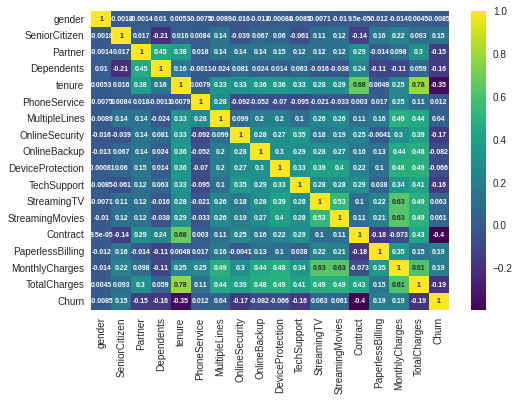

In [33]:
sns.heatmap(corr, cmap='viridis', annot = True,
            annot_kws={'fontsize':7, 'fontweight':'bold'});

In [34]:
corr['Churn'].sort_values(ascending=False, key=lambda x: x.abs())

Churn               1.000000
Contract           -0.396150
tenure             -0.354049
MonthlyCharges      0.192858
PaperlessBilling    0.191454
TotalCharges       -0.188053
OnlineSecurity     -0.171270
TechSupport        -0.164716
Dependents         -0.163128
SeniorCitizen       0.150541
Partner            -0.149982
OnlineBackup       -0.082307
DeviceProtection   -0.066193
StreamingTV         0.063254
StreamingMovies     0.060860
MultipleLines       0.040033
PhoneService        0.011691
gender             -0.008545
Name: Churn, dtype: float64

**Answer for Q1**: The most correlated variables with Churn as shown in the heatmap are tenure which is negatively correlated with a coefficient of -0.353
total charges which is negatively correlated with -0.2 and monthly charges which is positively corelated with 0.193

**Q2: Which payment method has the highest churn rate?**

**Visualization**

In [35]:
#plot a bar graph of each categorial feature against the target class (i.e. the class we'd like to predict, 'Churn' in this case). What the bar graph shows is the mean churn (which we can calculate because of label encoding attrition) for each category. 
#The short black vertical lines represent error bars.
categorical_features = categorical_col.copy()
categorical_features.remove('Churn')



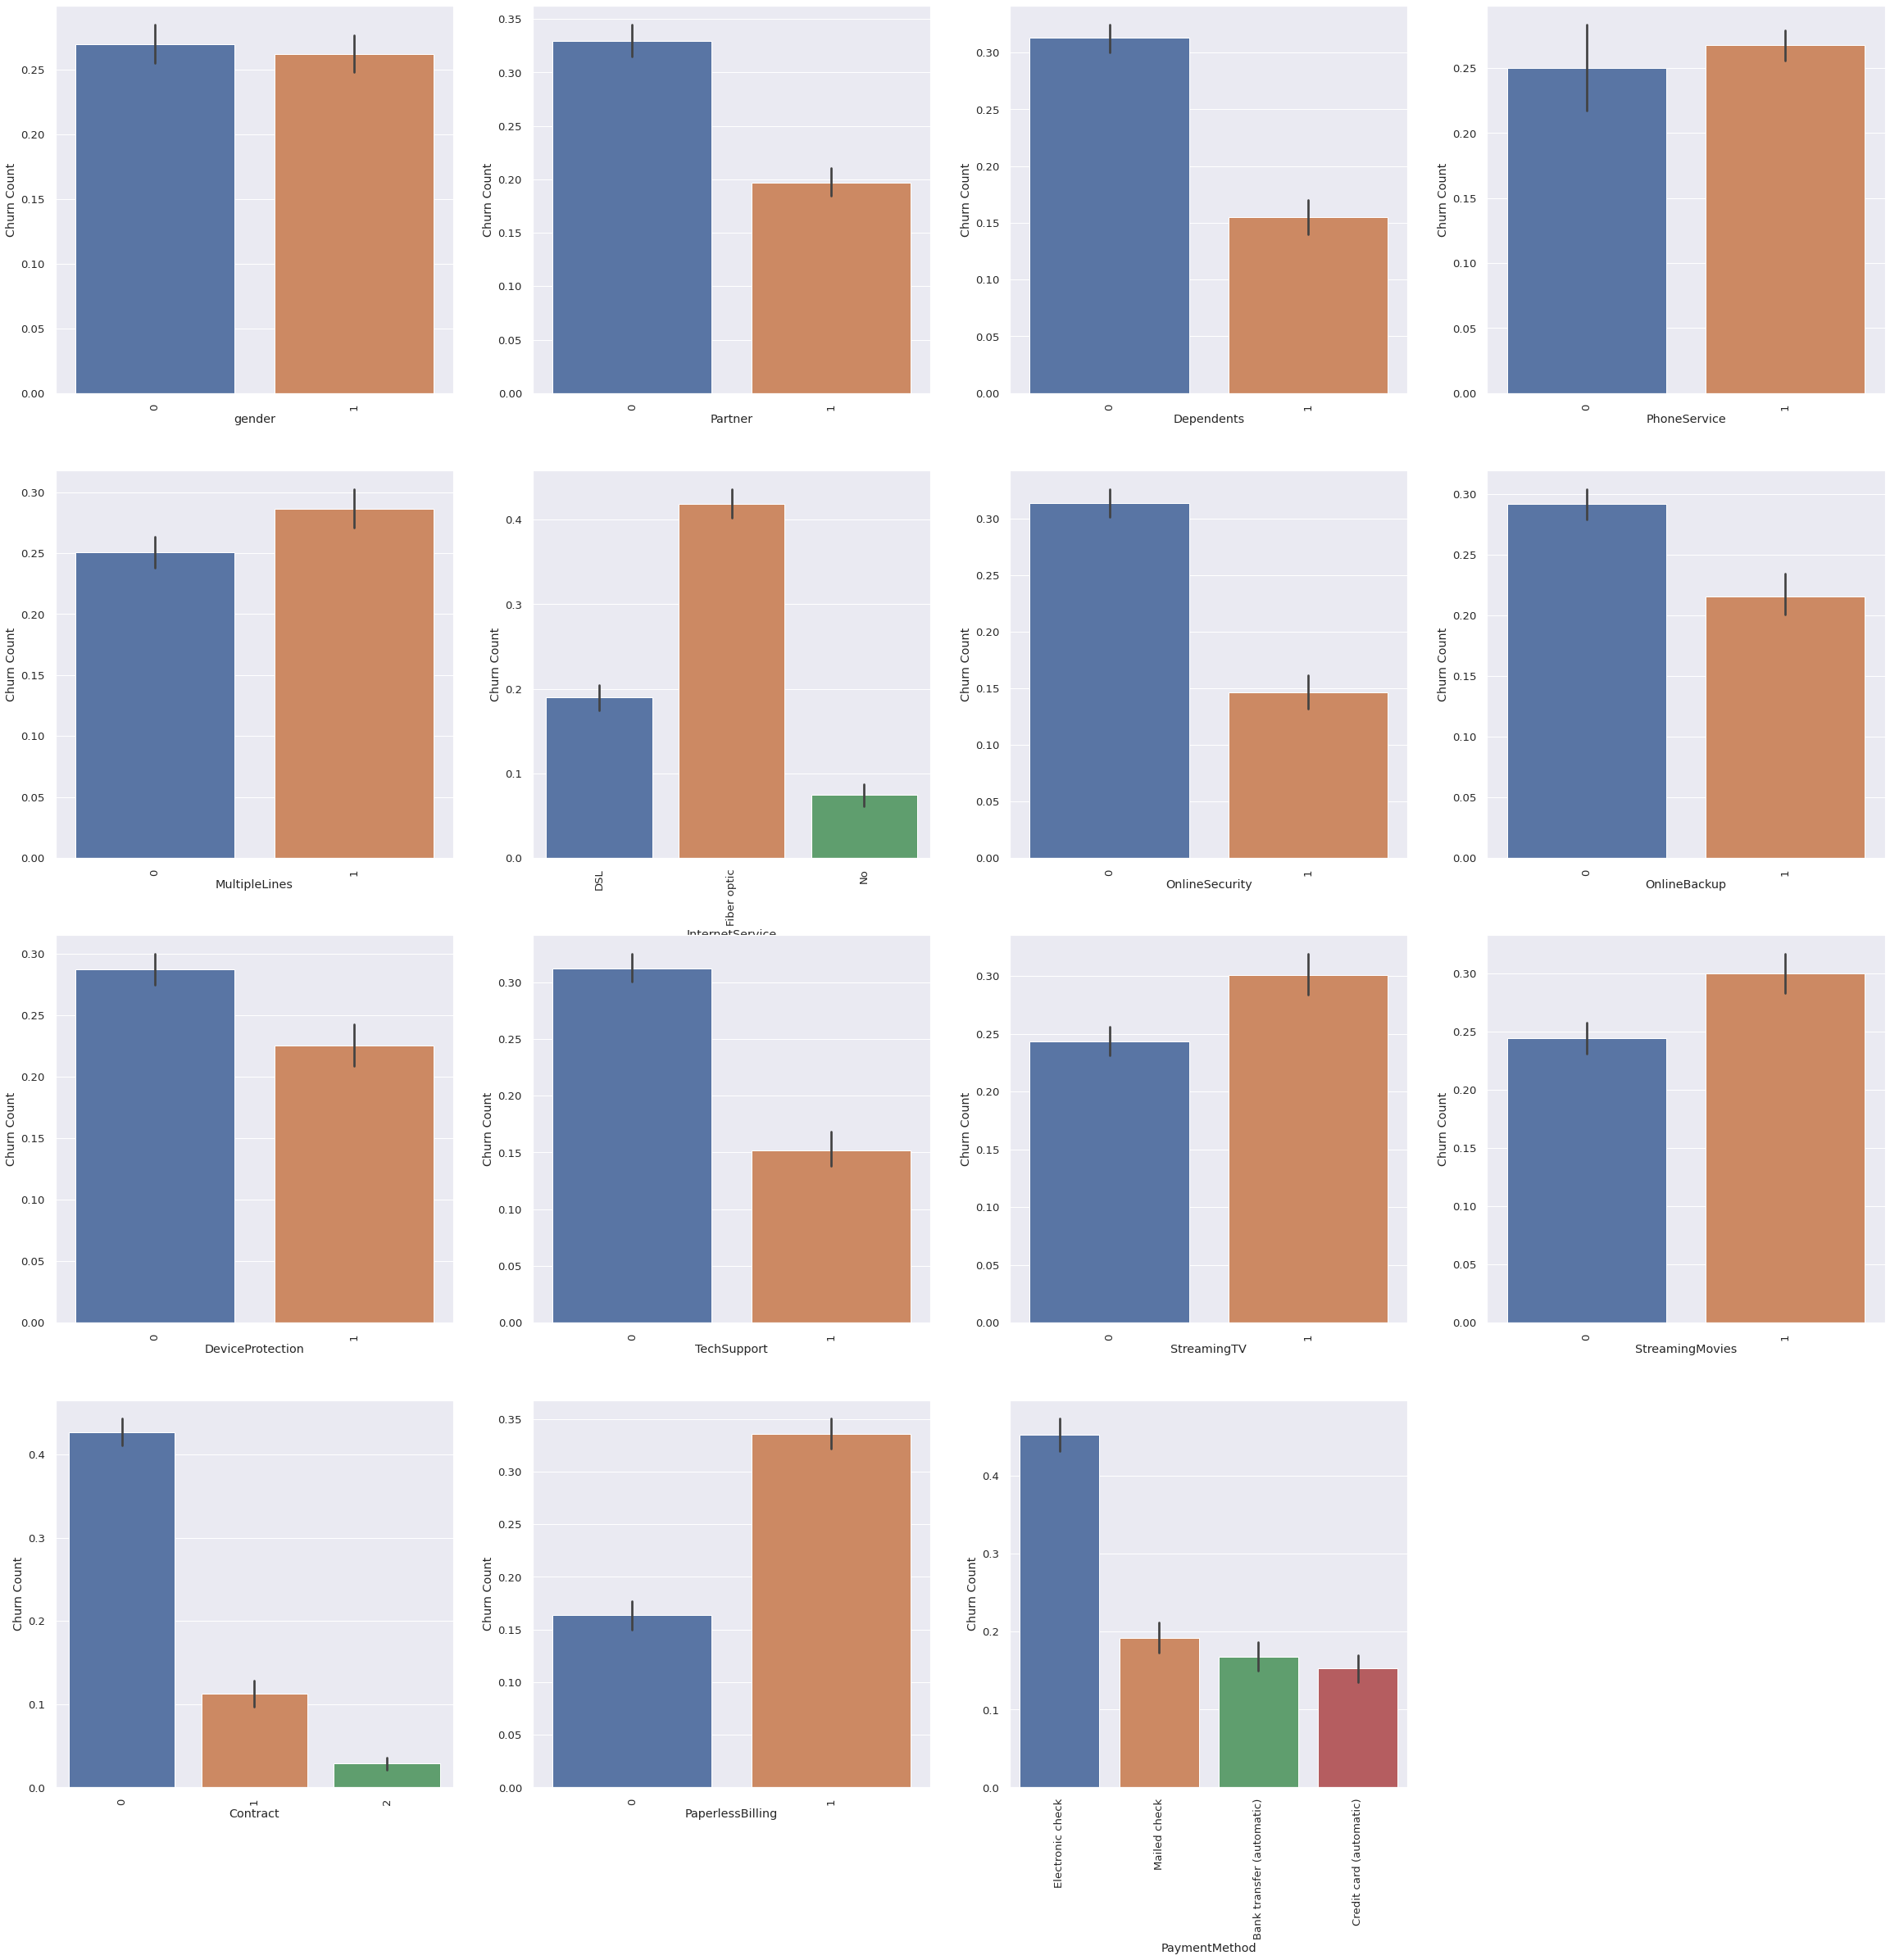

In [36]:
# Plotting every feature average in relation to the "target" which is churn
sns.set(font_scale=1.2)
plt.figure(figsize=(40, 40))

for i, column in enumerate(categorical_features, 1):
    plt.subplot(4, 4, i)
    g = sns.barplot(x=column, y='Churn', data=df)
    g.set_xticklabels(g.get_xticklabels(), rotation=90)
    plt.ylabel('Churn Count')
    plt.xlabel(f'{column}')

**Answer for Q2**: As shown in the graph above, the electronic check payment method has the highest churn which is about 0.45

**Q3: After how many months do customers commonly churn?** (Hint: show and interpret the distribution)

**Visualization**

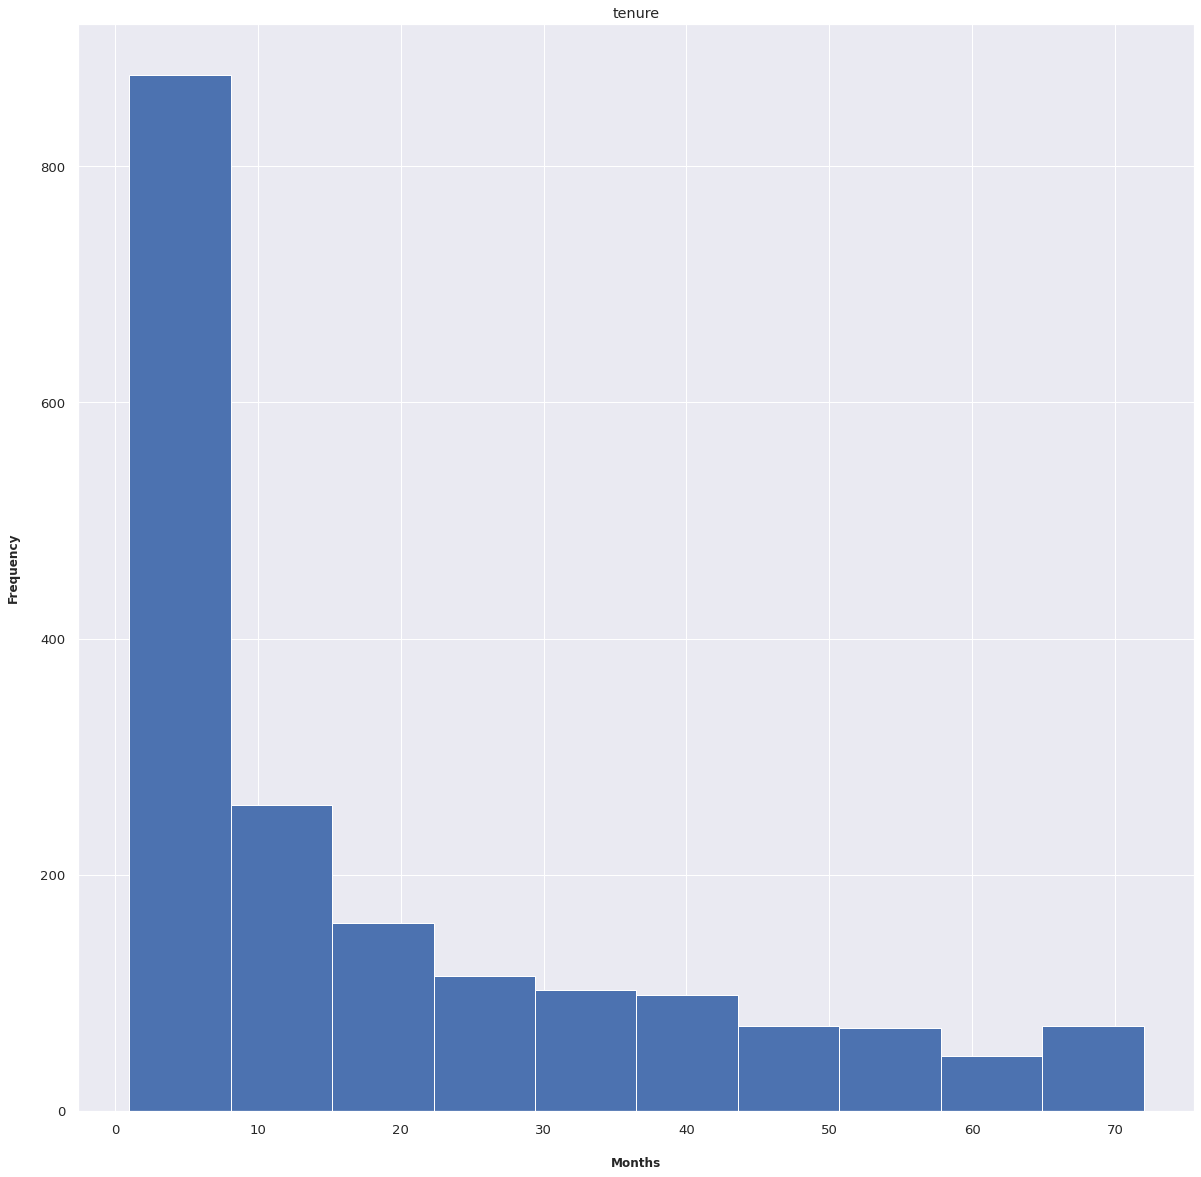

In [37]:

ax=df[df['Churn']==1].hist(column='tenure', figsize=(20, 20))
ax = ax[0]
for x in ax:
# Set x-axis label
    x.set_xlabel("Months", labelpad=20, weight='bold', size=12)

    # Set y-axis label
    x.set_ylabel("Frequency", labelpad=20, weight='bold', size=12)

<AxesSubplot:title={'center':'Distribution of Tenure'}>

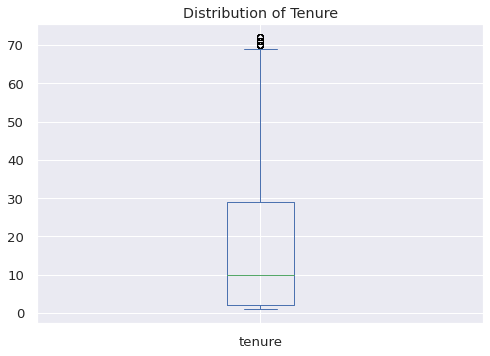

In [38]:
df[df['Churn']==1]['tenure'].plot(kind='box', title='Distribution of Tenure')

In [39]:
df[df['Churn']==1].tenure.quantile([0.25,0.5,0.75])

0.25     2.0
0.50    10.0
0.75    29.0
Name: tenure, dtype: float64

**Answer for Q3**: As shown in the tenure histogram the first quantile which is the 25th percentile is 2 months (the 25% of the distribution) which are the first quantile. As for the 50% or median they are composed of 10 . For the 75% they are composed of 29 months (which is shown in the 75% of the distribution) or third quantile. customers commonly churn after 10 months as it is the average

## Data Preparation for Modelling

In [40]:
#remove the redundant duplicate binary columns before proceeding
df_encoded = df.copy()
df_encoded = pd.get_dummies(df_encoded, columns=categorical_features)
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 39 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7032 non-null   int64  
 1   tenure                                   7032 non-null   int64  
 2   MonthlyCharges                           7032 non-null   float64
 3   TotalCharges                             7032 non-null   float64
 4   Churn                                    7032 non-null   int8   
 5   gender_0                                 7032 non-null   uint8  
 6   gender_1                                 7032 non-null   uint8  
 7   Partner_0                                7032 non-null   uint8  
 8   Partner_1                                7032 non-null   uint8  
 9   Dependents_0                             7032 non-null   uint8  
 10  Dependents_1                             7032 no

In [41]:
#dropping redundant and insignificant columns
df_encoded.drop(['gender_1', 'Partner_1', 'Dependents_1', 'PhoneService_1', 'MultipleLines_1','OnlineSecurity_1', 'OnlineBackup_1', 'DeviceProtection_1',
                 'TechSupport_1', 'StreamingTV_1', 'StreamingMovies_1', 'PaperlessBilling_1'], axis='columns', inplace=True)

df_encoded.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'gender_0', 'Partner_0', 'Dependents_0', 'PhoneService_0',
       'MultipleLines_0', 'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_0', 'OnlineBackup_0',
       'DeviceProtection_0', 'TechSupport_0', 'StreamingTV_0',
       'StreamingMovies_0', 'Contract_0', 'Contract_1', 'Contract_2',
       'PaperlessBilling_0', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [42]:
#split the data into a training dataset and a testing dataset to assess the model's generalizability on unseen data
from sklearn.model_selection import train_test_split

X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Modelling

In [43]:
#modeling using the desicion tree classifier
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

### Tree Visualization

In [44]:
import graphviz
from sklearn.tree import export_graphviz
dot_data = export_graphviz(tree_clf, out_file=None,
                           feature_names=X.columns,
                           class_names=['No', 'Yes'],
                           filled=True, rounded=True,
                           special_characters=True) 
graph = graphviz.Source(dot_data)
graph
# alternatively, to export:
# graph.render('Churn')

the rules are splits based on the values of independent variables by comparing whether they are greater than or smaller than certain values making the splits into 2 values. As one decends into the tree structure, rules seperate the branches into progressively more similar groups of cases with regards to the dependent variable

customer churn example: if (Contract_Month-to-month ≤ 0.5= true)  AND (MonthlyCharges ≤ 93.675=false) AND (Contract_Two year ≤ 0.5=true) AND (TotalCharges ≤ 8072.875=false)
THEN Churn=Yes

for attributes with yes or no values a binary split occurs, where the split is made into two branches such as techsupport. for continous attributes a multi way split occurs in the form of ranges and the split is into two branches 

## Evaluation

In [45]:
#there is still a risk of overfitting on the test set because the parameters can be tweaked until the model performs optimally. This way, knowledge about the test set can “leak” into the model and evaluation metrics no longer report on generalization performance. To solve this problem, yet another part of the dataset can be held out as a so-called "validation set": training proceeds on the training set, after which evaluation is done on the validation set, and when the experiment seems to be successful, final evaluation can be done on the test set. For this problem, 
#stratified k-fold cross-validation will be used to conserve the same percentage of samples of each class in each fold.
#Since we want to lower customer churn, we want to correctly predict customers who will churn (true positive class),  we need to consider using recall, since we want a low rate of false negatives (i.e. customers who will churn but predicted falsely as not churning). On the other hand, we also don't want to to have all the customers to be predicted falsely as churning, so precision is also a metric we should consider. 
#Thus we'll use the f-measure as our metric for assessing the model, since it calculates the harmonic mean of precision and recall.
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

clf = DecisionTreeClassifier(random_state=42)

skf = StratifiedKFold(n_splits=3)

# Note how cross validation is applied on the training dataset
# The testing dataset is always left out and used -only- in the final evaluation
scores = cross_val_score(clf, X_train, y_train, cv=skf, scoring='f1')
scores

array([0.5194508 , 0.50921659, 0.49265537])

In [46]:
print("Score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Score: 0.51 (+/- 0.02)


If the class is imbalanced there is a concentration on a specific class we need to use precision and recall which is using the f1 measure however if classes are balanced we use accuracy and error rate. The score shows that the model is good as it is greater than 0.5. The range is from 0 to 1 where 0 is the score of the worst model. values less than 0.5 indicate a bad model and above 0.5 indicate that the model is good in terms of both precision and recall. The f1 measure is also a good metric as it has the ability to focus its performance on both balanced and imbalanced data sets.
there is still a risk of overfitting on the test set because the parameters can be modified until the model performs optimally. This way, knowledge about the test set will lead to the evaluation metrics no longer reporting on generalization performance. To solve this problem, yet another part of the dataset can be held out as a so-called "validation set": training proceeds on the training set, after which evaluation is done on the validation set, and when the experiment seems to be successful, final evaluation can be done on the test set. For this problem, stratified k-fold cross-validation will be used to conserve the same percentage of samples of each class in each fold. Since we want to lower customer churn, we want to correctly predict customers who will churn (true positive class),  we need to consider using recall, since we want a low rate of false negatives (i.e. customers who will churn but predicted falsely as not churning). On the other hand, we also don't want to to have all the customers to be predicted falsely as churning, so precision is also a metric we should consider. Thus we'll use the f-measure as our metric for assessing the model, since it calculates the harmonic mean of precision and recall.